In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


# Dataset

In [2]:
data =pd.read_csv('eCommerce_dataset.csv')
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [3]:
data.shape

(152618, 38)

### Checking Null Values

In [4]:
print(data.isnull().sum().sort_values(ascending= False))

order_delivered_customer_date    3286
product_category_name_e          2210
product_name_lenght              2180
product_category_name            2180
product_photos_qty               2180
product_description_lenght       2180
order_delivered_carrier_date     1582
review_id                        1288
review_score                     1288
geolocation_state                 317
geolocation_city                  317
product_height_cm                  26
product_weight_g                   26
product_length_cm                  26
product_width_cm                   26
order_approved_at                  22
payment_value                       6
payment_installments                6
payment_sequential                  6
payment_type                        6
order_item_id                       0
order_id                            0
price                               0
shipping_limit_date                 0
seller_id                           0
product_id                          0
order_purcha

# Feature Selection

In [5]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [6]:
# - Feature	                            Reason for Selection
#-----------------------------------------------------------------------------------------------
# price
# freight_value
# product_weight_g
# product_length_cm
# product_height_cm
# product_width_cm
# payment_value
# customer_state
# seller_state
# product_category_name
# shipping_limit_date
# order_estimated_delivery_date
# order_delivered_customer_date
# order_purchase_timestamp

In [7]:
# Derived Features
# create new features by calculating time differences:

# order_delivered_customer_date - order_purchase_timestamp → Target Variable: Delivery Time
# shipping_limit_date - order_purchase_timestamp → Shipping Delay
# order_estimated_delivery_date - order_delivered_customer_date → Difference in Estimated vs Actual Delivery

### New dataset with selected features

In [8]:
df = data[[ 
'price',
'freight_value',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm',
'payment_value',
'customer_state',
'seller_state',
'shipping_limit_date',
'order_estimated_delivery_date',
'order_delivered_customer_date',
'order_purchase_timestamp'
                    
                     ]]

In [9]:
# Rename price to product_price
# df.rename(columns = {'price': 'product_price'})

In [10]:
# Convert dates to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [11]:
# Calculate delivery time (in days)
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


In [12]:
df['Shipping Delay'] = (df['shipping_limit_date'] - df['order_purchase_timestamp']).dt.days

In [13]:
df['Estimated - Actual Delivery'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

In [14]:
# Rename column to match SQL alias
# df = df.rename(columns={
#     'product_category_name_english': 'product_category_name_e',
    
# })

In [15]:
df

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,customer_state,seller_state,shipping_limit_date,order_estimated_delivery_date,order_delivered_customer_date,order_purchase_timestamp,delivery_time,Shipping Delay,Estimated - Actual Delivery
0,58.90,13.29,650.0,28.0,9.0,14.0,72.19,RJ,SP,2017-09-19 09:45:35,2017-09-29,2017-09-20 23:43:48,2017-09-13 08:59:02,7.0,6,8.0
1,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,SP,SP,2017-05-03 11:05:13,2017-05-15,2017-05-12 16:04:24,2017-04-26 10:53:06,16.0,7,2.0
2,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,SP,SP,2017-05-03 11:05:13,2017-05-15,2017-05-12 16:04:24,2017-04-26 10:53:06,16.0,7,2.0
3,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,MG,MG,2018-01-18 14:48:30,2018-02-05,2018-01-22 13:19:16,2018-01-14 14:33:31,7.0,4,13.0
4,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,MG,MG,2018-01-18 14:48:30,2018-02-05,2018-01-22 13:19:16,2018-01-14 14:33:31,7.0,4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152613,299.99,43.41,10150.0,89.0,15.0,40.0,343.40,MA,SC,2018-05-02 04:11:01,2018-05-18,2018-05-10 22:56:40,2018-04-23 13:57:06,17.0,8,7.0
152614,350.00,36.53,8950.0,45.0,26.0,38.0,386.53,PR,SP,2018-07-20 04:31:48,2018-08-01,2018-07-23 20:31:55,2018-07-14 10:26:46,9.0,5,8.0
152615,99.90,16.95,967.0,21.0,24.0,19.0,116.85,SP,PR,2017-10-30 17:14:25,2017-11-10,2017-10-28 12:22:22,2017-10-23 17:07:56,4.0,7,12.0
152616,55.99,8.72,100.0,20.0,20.0,20.0,64.71,SP,SP,2017-08-21 00:04:32,2017-08-25,2017-08-16 21:59:40,2017-08-14 23:02:59,1.0,6,8.0


### Dataset Cleaning


In [16]:
# Duplicate Checking
df.duplicated().value_counts()

False    106149
True      46469
Name: count, dtype: int64

In [17]:
# Droping Duplicate and assigning to new dataframe
df1= df.drop_duplicates()

In [18]:
df1.duplicated().value_counts()

False    106149
Name: count, dtype: int64

### Cheaking nullvalues

In [19]:
print(df.isnull().sum().sort_values(ascending= False))

delivery_time                    3286
Estimated - Actual Delivery      3286
order_delivered_customer_date    3286
product_length_cm                  26
product_width_cm                   26
product_weight_g                   26
product_height_cm                  26
payment_value                       6
customer_state                      0
price                               0
freight_value                       0
seller_state                        0
order_estimated_delivery_date       0
shipping_limit_date                 0
order_purchase_timestamp            0
Shipping Delay                      0
dtype: int64


In [20]:
# null Values removed
df1.dropna(inplace=True)

In [21]:
print(df1.isnull().sum().sort_values(ascending= False))

price                            0
freight_value                    0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_value                    0
customer_state                   0
seller_state                     0
shipping_limit_date              0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_purchase_timestamp         0
delivery_time                    0
Shipping Delay                   0
Estimated - Actual Delivery      0
dtype: int64


### Outliers Identification

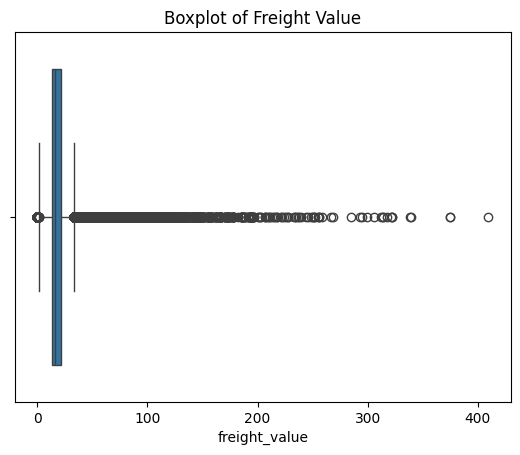

In [22]:
# Boxplot for freight_value , checking outliers
sns.boxplot(x=df1['freight_value'])
plt.title("Boxplot of Freight Value")
plt.show()

### Removing outliers using IQR method

In [23]:
Q1 = df1['freight_value'].quantile(0.25)
Q3 = df1['freight_value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df1[(df1['freight_value'] >= lower_bound) & (df1['freight_value'] <= upper_bound)]
df_clean.head(10)

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,customer_state,seller_state,shipping_limit_date,order_estimated_delivery_date,order_delivered_customer_date,order_purchase_timestamp,delivery_time,Shipping Delay,Estimated - Actual Delivery
0,58.90,13.29,650.0,28.0,9.0,14.0,72.19,RJ,SP,2017-09-19 09:45:35,2017-09-29,2017-09-20 23:43:48,2017-09-13 08:59:02,7.0,6,8.0
1,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,SP,SP,2017-05-03 11:05:13,2017-05-15,2017-05-12 16:04:24,2017-04-26 10:53:06,16.0,7,2.0
3,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,MG,MG,2018-01-18 14:48:30,2018-02-05,2018-01-22 13:19:16,2018-01-14 14:33:31,7.0,4,13.0
5,12.99,12.79,200.0,16.0,10.0,15.0,25.78,SP,SP,2018-08-15 10:10:18,2018-08-20,2018-08-14 13:32:39,2018-08-08 10:00:35,6.0,7,5.0
6,199.90,18.14,3750.0,35.0,40.0,30.0,218.04,SP,PR,2017-02-13 13:57:51,2017-03-17,2017-03-01 16:42:31,2017-02-04 13:57:51,25.0,9,15.0
7,21.90,12.69,450.0,24.0,8.0,15.0,34.59,MG,SP,2017-05-23 03:55:27,2017-06-06,2017-05-22 13:44:35,2017-05-15 21:42:34,6.0,7,14.0
8,19.90,11.85,200.0,27.0,5.0,20.0,31.75,SP,SP,2017-12-14 12:10:31,2018-01-04,2017-12-18 22:03:38,2017-12-10 11:53:48,8.0,4,16.0
10,145.95,11.65,2000.0,30.0,12.0,16.0,157.60,SP,SP,2018-03-26 18:31:29,2018-03-29,2018-03-29 18:17:31,2018-03-19 18:40:33,9.0,6,-1.0
11,53.99,11.40,850.0,29.0,3.0,21.0,65.39,SP,SP,2018-07-06 14:10:56,2018-07-23,2018-07-04 17:28:31,2018-07-02 13:59:39,2.0,4,18.0
12,59.99,8.88,950.0,35.0,25.0,20.0,68.87,SP,SP,2018-03-29 22:28:09,2018-04-09,2018-03-29 00:04:19,2018-03-24 22:16:10,4.0,5,10.0


In [24]:
df_clean.tail()

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,customer_state,seller_state,shipping_limit_date,order_estimated_delivery_date,order_delivered_customer_date,order_purchase_timestamp,delivery_time,Shipping Delay,Estimated - Actual Delivery
152606,17.90,22.06,200.0,25.0,5.0,18.0,39.96,RJ,SC,2018-04-09 05:08:33,2018-04-27,2018-04-16 16:56:38,2018-03-30 15:36:49,17.0,9,10.0
152611,119.85,20.03,1050.0,16.0,20.0,16.0,139.88,MG,SP,2018-06-28 09:58:03,2018-07-23,2018-07-05 17:51:08,2018-06-19 09:27:48,16.0,9,17.0
152615,99.90,16.95,967.0,21.0,24.0,19.0,116.85,SP,PR,2017-10-30 17:14:25,2017-11-10,2017-10-28 12:22:22,2017-10-23 17:07:56,4.0,7,12.0
152616,55.99,8.72,100.0,20.0,20.0,20.0,64.71,SP,SP,2017-08-21 00:04:32,2017-08-25,2017-08-16 21:59:40,2017-08-14 23:02:59,1.0,6,8.0
152617,43.00,12.79,600.0,30.0,3.0,19.0,55.79,SP,SP,2018-06-12 17:10:13,2018-06-28,2018-06-14 17:56:26,2018-06-09 17:00:18,5.0,3,13.0


### Chart without outliers

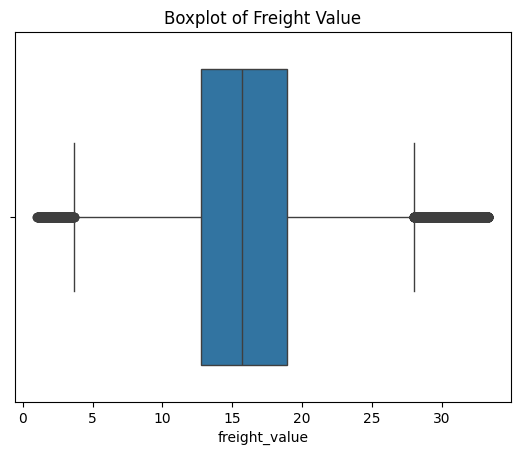

In [25]:
# Boxplot for freight_value
sns.boxplot(x=df_clean['freight_value'])
plt.title("Boxplot of Freight Value")
plt.show()

### one-hot encoding

In [26]:
df_clean = pd.get_dummies(df_clean, columns=['seller_state', 'customer_state'], drop_first=True)

In [27]:
df_clean

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_value,shipping_limit_date,order_estimated_delivery_date,order_delivered_customer_date,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,58.90,13.29,650.0,28.0,9.0,14.0,72.19,2017-09-19 09:45:35,2017-09-29,2017-09-20 23:43:48,...,False,True,False,False,False,False,False,False,False,False
1,239.90,19.93,30000.0,50.0,30.0,40.0,259.83,2017-05-03 11:05:13,2017-05-15,2017-05-12 16:04:24,...,False,False,False,False,False,False,False,False,True,False
3,199.00,17.87,3050.0,33.0,13.0,33.0,216.87,2018-01-18 14:48:30,2018-02-05,2018-01-22 13:19:16,...,False,False,False,False,False,False,False,False,False,False
5,12.99,12.79,200.0,16.0,10.0,15.0,25.78,2018-08-15 10:10:18,2018-08-20,2018-08-14 13:32:39,...,False,False,False,False,False,False,False,False,True,False
6,199.90,18.14,3750.0,35.0,40.0,30.0,218.04,2017-02-13 13:57:51,2017-03-17,2017-03-01 16:42:31,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152606,17.90,22.06,200.0,25.0,5.0,18.0,39.96,2018-04-09 05:08:33,2018-04-27,2018-04-16 16:56:38,...,False,True,False,False,False,False,False,False,False,False
152611,119.85,20.03,1050.0,16.0,20.0,16.0,139.88,2018-06-28 09:58:03,2018-07-23,2018-07-05 17:51:08,...,False,False,False,False,False,False,False,False,False,False
152615,99.90,16.95,967.0,21.0,24.0,19.0,116.85,2017-10-30 17:14:25,2017-11-10,2017-10-28 12:22:22,...,False,False,False,False,False,False,False,False,True,False
152616,55.99,8.72,100.0,20.0,20.0,20.0,64.71,2017-08-21 00:04:32,2017-08-25,2017-08-16 21:59:40,...,False,False,False,False,False,False,False,False,True,False


# Model Buildiing

### Independent (target) and Dependent Features 

In [28]:
# Separate features (X) and target variable (y)
X = df_clean.drop(columns=['delivery_time'])  # Independent variables
y = df_clean['delivery_time']  # Target variable

### Split into Train & Test(.2)

In [29]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

### RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = round(mean_absolute_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred),2)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [368]:
# Random RandomForestRegressor

# # Mean Absolute Error (MAE): 1.76
# # R² Score: 0.73

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'seller_state',
#                     'price',
#                      'review_score',
                     
#                      'seller_zip_code_prefix',
                     
#                      'customer_zip_code_prefix',
#                      'freight_value'
                     
                    
#                      ]]

### LinearRegression with PolynomialFeatures Trasform 

In [369]:
# poly = PolynomialFeatures(degree=2)

# # Transform the features into polynomial features
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)

# # Create a Linear Regression model
# model = LinearRegression()

# # Fit the model to the transformed features
# model.fit(X_poly_train, y_train)

# # Predict on test data
# y_pred = model.predict(X_poly_test)

# # Calculate the R² score and Mean Squared Error
# r2 = round(r2_score(y_test, y_pred),2)
# mse = round(mean_squared_error(y_test, y_pred),2)

# print(f"R² Score: {r2}")
# print(f"Mean Squared Error: {mse}")

#### Sample of feature used with polyfeature

In [371]:
# poly = PolynomialFeatures(degree=2)

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'price',
#                      'seller_state',
#                      'review_score',
#                      'freight_value'
#                      ]]

# R² Score: 0.6192978325352929
# Mean Squared Error: 12.47445301898551

### LinerRegression Model

In [376]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 2))

R² Score: 0.5255
Mean Absolute Error (MAE): 2.7


#### Sample Features for LinerRegression

In [ ]:
# LinearRegression
# R² Score: 0.5255
# Mean Absolute Error (MAE): 2.7

# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'seller_state',
#                     'price',
#                      'review_score',
                     
#                      'seller_zip_code_prefix',
                     
#                      'customer_zip_code_prefix',
#                      'freight_value'
                     
                    
#                      ]]


In [374]:
# LinearRegression
# df = data[[ 'product_weight_g',
#                'product_length_cm',
#                  'product_height_cm',
#                    'product_width_cm', 
#                      'customer_state',
#                       'price',
#                      'seller_state',
#                      'review_score',
#                      'freight_value',
#                      'seller_zip_code_prefix',
#                      'seller_city',
#                      'customer_zip_code_prefix',
#                      'customer_city'
#                      ]]

# R² Score: 0.5318
# Mean Absolute Error (MAE): 2.63